### Training a Classification Network

In [1]:
import matplotlib.pyplot as plt
import importlib as imp

from keras.utils import to_categorical
from keras.layers import Activation, Dense

Using TensorFlow backend.


In [2]:
%run ./../Functions/solver.py
%run ./../Functions/generators.py
%run ./../Functions/stat_functions.py
%run ./../Functions/list_functions.py
%run ./../Functions/model_functions.py
%run ./../Functions/playing_functions.py

In [3]:
sample_size = 20
bound_sup = 300

#### Generating the Training and Test database

In [4]:
data_train_X,data_train_Y = gen.generate_formated_data_base(10000,sample_size,bound_sup)
print(1)
data_test_X,data_test_Y = gen.generate_formated_data_base(1000,sample_size,bound_sup)
print(2)

1
2


#### Adding the features to the database

In [5]:
X_train_feature,Y_train_feature = add_elmt_feature_gap_feature(data_train_X),data_train_Y
X_test_feature,Y_test_feature = add_elmt_feature_gap_feature(data_test_X),data_test_Y

Y_train_feature = to_categorical(data_train_Y, num_classes=2)
Y_test_feature = to_categorical(data_test_Y, num_classes=2)

### Defining and training the networks

Let's first train a NN without giving it any feature:

In [6]:
X_train, Y_train = data_train_X, to_categorical(data_train_Y, num_classes=2)
X_test, Y_test = data_test_X, to_categorical(data_test_Y, num_classes=2)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(bound_sup + 1 ,), use_bias = True),
    tf.keras.layers.Dense(100, activation='sigmoid',use_bias = True),
    tf.keras.layers.Dense(50, activation='sigmoid',use_bias = True),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax,use_bias = True)
])

learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(lr = learning_rate), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
history = model.fit(data_train_X, Y_train_feature, validation_data = (data_test_X,Y_test_feature),
                                    epochs=500)

Train on 10000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
10000/10000 [==============================] - 2s 203us/sample - loss: 0.5969 - acc: 0.7158 - val_loss: 0.5620 - val_acc: 0.7500
Epoch 2/500
10000/10000 [==============================] - 1s 128us/sample - loss: 0.5946 - acc: 0.7158 - val_loss: 0.5597 - val_acc: 0.7500
Epoch 3/500
10000/10000 [==============================] - 1s 128us/sample - loss: 0.5913 - acc: 0.7158 - val_loss: 0.5583 - val_acc: 0.7500
Epoch 4/500
10000/10000 [==============================] - 1s 124us/sample - loss: 0.5847 - acc: 0.7158 - val_loss: 0.5482 - val_acc: 0.7500
Epoch 5/500
10000/10000 [==============================] - 1s 125us/sample - loss: 0.5720 - acc: 0.7158 - val_loss: 0.5340 - val_acc: 0.7500
Epoch 6/500
10000/10000 [==============================] - 2s 160us/sample - loss: 0.5507 - acc: 0.7158 - val_loss: 0.5142 - val_acc: 0.7500
Epoch 7/500
10000/10000 [==============================] 

10000/10000 [==============================] - 2s 154us/sample - loss: 0.4536 - acc: 0.7292 - val_loss: 0.4487 - val_acc: 0.7350
Epoch 57/500
10000/10000 [==============================] - 2s 165us/sample - loss: 0.4534 - acc: 0.7282 - val_loss: 0.4510 - val_acc: 0.7210
Epoch 58/500
10000/10000 [==============================] - 2s 225us/sample - loss: 0.4538 - acc: 0.7242 - val_loss: 0.4507 - val_acc: 0.7240
Epoch 59/500
10000/10000 [==============================] - 2s 214us/sample - loss: 0.4532 - acc: 0.7264 - val_loss: 0.4535 - val_acc: 0.7180
Epoch 60/500
10000/10000 [==============================] - 2s 193us/sample - loss: 0.4528 - acc: 0.7248 - val_loss: 0.4541 - val_acc: 0.7140
Epoch 61/500
10000/10000 [==============================] - 2s 217us/sample - loss: 0.4527 - acc: 0.7258 - val_loss: 0.4508 - val_acc: 0.7230
Epoch 62/500
10000/10000 [==============================] - 1s 141us/sample - loss: 0.4523 - acc: 0.7246 - val_loss: 0.4504 - val_acc: 0.7210
Epoch 63/500
10000/

Epoch 114/500
10000/10000 [==============================] - 1s 106us/sample - loss: 0.4455 - acc: 0.7206 - val_loss: 0.4553 - val_acc: 0.7120
Epoch 115/500
10000/10000 [==============================] - 1s 112us/sample - loss: 0.4455 - acc: 0.7204 - val_loss: 0.4551 - val_acc: 0.7110
Epoch 116/500
10000/10000 [==============================] - 1s 118us/sample - loss: 0.4452 - acc: 0.7231 - val_loss: 0.4549 - val_acc: 0.7150
Epoch 117/500
10000/10000 [==============================] - 1s 121us/sample - loss: 0.4454 - acc: 0.7198 - val_loss: 0.4556 - val_acc: 0.7070
Epoch 118/500
10000/10000 [==============================] - 1s 143us/sample - loss: 0.4453 - acc: 0.7189 - val_loss: 0.4554 - val_acc: 0.7260
Epoch 119/500
10000/10000 [==============================] - 2s 171us/sample - loss: 0.4453 - acc: 0.7211 - val_loss: 0.4562 - val_acc: 0.7110
Epoch 120/500
10000/10000 [==============================] - 2s 166us/sample - loss: 0.4449 - acc: 0.7202 - val_loss: 0.4573 - val_acc: 0.7080

10000/10000 [==============================] - 1s 122us/sample - loss: 0.4418 - acc: 0.7252 - val_loss: 0.4623 - val_acc: 0.7060
Epoch 172/500
10000/10000 [==============================] - 1s 109us/sample - loss: 0.4415 - acc: 0.7254 - val_loss: 0.4631 - val_acc: 0.6990
Epoch 173/500
10000/10000 [==============================] - 1s 112us/sample - loss: 0.4416 - acc: 0.7247 - val_loss: 0.4629 - val_acc: 0.6980
Epoch 174/500
10000/10000 [==============================] - 1s 115us/sample - loss: 0.4417 - acc: 0.7276 - val_loss: 0.4606 - val_acc: 0.7240
Epoch 175/500
10000/10000 [==============================] - 1s 115us/sample - loss: 0.4417 - acc: 0.7274 - val_loss: 0.4620 - val_acc: 0.7040
Epoch 176/500
10000/10000 [==============================] - 1s 117us/sample - loss: 0.4414 - acc: 0.7279 - val_loss: 0.4593 - val_acc: 0.7250
Epoch 177/500
10000/10000 [==============================] - 2s 197us/sample - loss: 0.4413 - acc: 0.7255 - val_loss: 0.4594 - val_acc: 0.7250
Epoch 178/500

10000/10000 [==============================] - 1s 114us/sample - loss: 0.4342 - acc: 0.7491 - val_loss: 0.4675 - val_acc: 0.6990
Epoch 229/500
10000/10000 [==============================] - 1s 126us/sample - loss: 0.4342 - acc: 0.7487 - val_loss: 0.4664 - val_acc: 0.7080
Epoch 230/500
10000/10000 [==============================] - 1s 113us/sample - loss: 0.4334 - acc: 0.7464 - val_loss: 0.4672 - val_acc: 0.7090
Epoch 231/500
10000/10000 [==============================] - 1s 112us/sample - loss: 0.4332 - acc: 0.7476 - val_loss: 0.4651 - val_acc: 0.7010
Epoch 232/500
10000/10000 [==============================] - 1s 117us/sample - loss: 0.4330 - acc: 0.7478 - val_loss: 0.4682 - val_acc: 0.6970
Epoch 233/500
10000/10000 [==============================] - 1s 113us/sample - loss: 0.4324 - acc: 0.7522 - val_loss: 0.4635 - val_acc: 0.7160
Epoch 234/500
10000/10000 [==============================] - 1s 119us/sample - loss: 0.4325 - acc: 0.7504 - val_loss: 0.4685 - val_acc: 0.6920
Epoch 235/500

10000/10000 [==============================] - 1s 89us/sample - loss: 0.4223 - acc: 0.7662 - val_loss: 0.4814 - val_acc: 0.6970
Epoch 286/500
10000/10000 [==============================] - 1s 85us/sample - loss: 0.4225 - acc: 0.7649 - val_loss: 0.4838 - val_acc: 0.6820
Epoch 287/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.4224 - acc: 0.7676 - val_loss: 0.4798 - val_acc: 0.7010
Epoch 288/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.4219 - acc: 0.7668 - val_loss: 0.4874 - val_acc: 0.6830
Epoch 289/500
10000/10000 [==============================] - 1s 82us/sample - loss: 0.4219 - acc: 0.7680 - val_loss: 0.4816 - val_acc: 0.7050
Epoch 290/500
10000/10000 [==============================] - 1s 85us/sample - loss: 0.4217 - acc: 0.7686 - val_loss: 0.4809 - val_acc: 0.7050
Epoch 291/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.4215 - acc: 0.7675 - val_loss: 0.4790 - val_acc: 0.7120
Epoch 292/500
10000/

Epoch 343/500
10000/10000 [==============================] - 1s 82us/sample - loss: 0.4138 - acc: 0.7723 - val_loss: 0.5008 - val_acc: 0.6910
Epoch 344/500
10000/10000 [==============================] - 1s 80us/sample - loss: 0.4128 - acc: 0.7714 - val_loss: 0.4966 - val_acc: 0.7010
Epoch 345/500
10000/10000 [==============================] - 1s 84us/sample - loss: 0.4131 - acc: 0.7708 - val_loss: 0.4936 - val_acc: 0.7040
Epoch 346/500
10000/10000 [==============================] - 1s 77us/sample - loss: 0.4131 - acc: 0.7709 - val_loss: 0.4997 - val_acc: 0.6880
Epoch 347/500
10000/10000 [==============================] - 1s 77us/sample - loss: 0.4126 - acc: 0.7730 - val_loss: 0.5018 - val_acc: 0.6930
Epoch 348/500
10000/10000 [==============================] - 1s 77us/sample - loss: 0.4122 - acc: 0.7732 - val_loss: 0.4997 - val_acc: 0.6900
Epoch 349/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.4124 - acc: 0.7737 - val_loss: 0.4998 - val_acc: 0.6870
Epoch 

10000/10000 [==============================] - 1s 88us/sample - loss: 0.4026 - acc: 0.7833 - val_loss: 0.5036 - val_acc: 0.6970
Epoch 401/500
10000/10000 [==============================] - 1s 89us/sample - loss: 0.4030 - acc: 0.7817 - val_loss: 0.5088 - val_acc: 0.6880
Epoch 402/500
10000/10000 [==============================] - 1s 103us/sample - loss: 0.4025 - acc: 0.7823 - val_loss: 0.5067 - val_acc: 0.6970
Epoch 403/500
10000/10000 [==============================] - 1s 87us/sample - loss: 0.4023 - acc: 0.7844 - val_loss: 0.5026 - val_acc: 0.7040
Epoch 404/500
10000/10000 [==============================] - 1s 80us/sample - loss: 0.4024 - acc: 0.7836 - val_loss: 0.5114 - val_acc: 0.6880
Epoch 405/500
10000/10000 [==============================] - 1s 81us/sample - loss: 0.4020 - acc: 0.7848 - val_loss: 0.5062 - val_acc: 0.6940
Epoch 406/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.4016 - acc: 0.7838 - val_loss: 0.5125 - val_acc: 0.6900
Epoch 407/500
10000

Epoch 458/500
10000/10000 [==============================] - 1s 85us/sample - loss: 0.3899 - acc: 0.7931 - val_loss: 0.5177 - val_acc: 0.6870
Epoch 459/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.3897 - acc: 0.7942 - val_loss: 0.5146 - val_acc: 0.6880
Epoch 460/500
10000/10000 [==============================] - 1s 84us/sample - loss: 0.3897 - acc: 0.7931 - val_loss: 0.5185 - val_acc: 0.6850
Epoch 461/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.3894 - acc: 0.7955 - val_loss: 0.5253 - val_acc: 0.6890
Epoch 462/500
10000/10000 [==============================] - 1s 83us/sample - loss: 0.3889 - acc: 0.7960 - val_loss: 0.5204 - val_acc: 0.6830
Epoch 463/500
10000/10000 [==============================] - 1s 84us/sample - loss: 0.3886 - acc: 0.7910 - val_loss: 0.5164 - val_acc: 0.6920
Epoch 464/500
10000/10000 [==============================] - 1s 93us/sample - loss: 0.3885 - acc: 0.7968 - val_loss: 0.5167 - val_acc: 0.6900
Epoch 

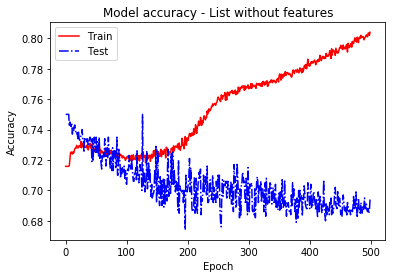

In [9]:
plt.plot(history.history['acc'],"r-")
plt.plot(history.history['val_acc'],"b-.")
plt.title('Model accuracy - List without features')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

We can clearly see the overfitting building up as the training goes.

---

Now let's train another one but adding the features to the input of the NN:

In [10]:
X_train_feature,Y_train_feature = add_elmt_feature_gap_feature(data_train_X),to_categorical(data_train_Y, num_classes=2)
X_test_feature,Y_test_feature = add_elmt_feature_gap_feature(data_test_X),to_categorical(data_test_Y, num_classes=2)

In [11]:
model_feature = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(bound_sup + 18,), use_bias = True),
    tf.keras.layers.Dense(100, activation='sigmoid',use_bias = True),
    tf.keras.layers.Dense(50, activation='sigmoid',use_bias = True),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax,use_bias = True)
])

learning_rate = 0.0001

model_feature.compile(optimizer=tf.keras.optimizers.Adam(lr = learning_rate), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history_feature = model_feature.fit(X_train_feature, Y_train_feature, validation_data = (X_test_feature,Y_test_feature),
                                    epochs=200)

Train on 10000 samples, validate on 1000 samples
Epoch 1/200
10000/10000 [==============================] - 1s 124us/sample - loss: 0.6285 - acc: 0.6580 - val_loss: 0.5551 - val_acc: 0.7500
Epoch 2/200
10000/10000 [==============================] - 1s 102us/sample - loss: 0.5785 - acc: 0.7158 - val_loss: 0.5361 - val_acc: 0.7500
Epoch 3/200
10000/10000 [==============================] - 1s 95us/sample - loss: 0.5561 - acc: 0.7158 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 4/200
10000/10000 [==============================] - 1s 94us/sample - loss: 0.5350 - acc: 0.7158 - val_loss: 0.4954 - val_acc: 0.7500
Epoch 5/200
10000/10000 [==============================] - 1s 94us/sample - loss: 0.5172 - acc: 0.7158 - val_loss: 0.4800 - val_acc: 0.7500
Epoch 6/200
10000/10000 [==============================] - 1s 95us/sample - loss: 0.5083 - acc: 0.7158 - val_loss: 0.4724 - val_acc: 0.7530
Epoch 7/200
10000/10000 [==============================] - 1s 94us/sample - loss: 0.4980 - acc: 0.7162 - val_

Epoch 59/200
10000/10000 [==============================] - 1s 89us/sample - loss: 0.3411 - acc: 0.8638 - val_loss: 0.3104 - val_acc: 0.8900
Epoch 60/200
10000/10000 [==============================] - 1s 88us/sample - loss: 0.3180 - acc: 0.8773 - val_loss: 0.2850 - val_acc: 0.8970
Epoch 61/200
10000/10000 [==============================] - 1s 89us/sample - loss: 0.2880 - acc: 0.8968 - val_loss: 0.2903 - val_acc: 0.8780
Epoch 62/200
10000/10000 [==============================] - 1s 88us/sample - loss: 0.2555 - acc: 0.9032 - val_loss: 0.2018 - val_acc: 0.9360
Epoch 63/200
10000/10000 [==============================] - 1s 92us/sample - loss: 0.2240 - acc: 0.9229 - val_loss: 0.1924 - val_acc: 0.9360
Epoch 64/200
10000/10000 [==============================] - 1s 103us/sample - loss: 0.2159 - acc: 0.9248 - val_loss: 0.1831 - val_acc: 0.9430
Epoch 65/200
10000/10000 [==============================] - 1s 93us/sample - loss: 0.2004 - acc: 0.9307 - val_loss: 0.1725 - val_acc: 0.9430
Epoch 66/200

Epoch 117/200
10000/10000 [==============================] - 1s 100us/sample - loss: 0.1139 - acc: 0.9548 - val_loss: 0.2309 - val_acc: 0.9020
Epoch 118/200
10000/10000 [==============================] - 1s 97us/sample - loss: 0.1160 - acc: 0.9532 - val_loss: 0.0989 - val_acc: 0.9630
Epoch 119/200
10000/10000 [==============================] - 1s 107us/sample - loss: 0.1134 - acc: 0.9548 - val_loss: 0.1008 - val_acc: 0.9630
Epoch 120/200
10000/10000 [==============================] - 1s 110us/sample - loss: 0.1206 - acc: 0.9497 - val_loss: 0.1140 - val_acc: 0.9580
Epoch 121/200
10000/10000 [==============================] - 1s 134us/sample - loss: 0.1156 - acc: 0.9536 - val_loss: 0.1053 - val_acc: 0.9590
Epoch 122/200
10000/10000 [==============================] - 1s 109us/sample - loss: 0.1177 - acc: 0.9513 - val_loss: 0.1035 - val_acc: 0.9620
Epoch 123/200
10000/10000 [==============================] - 1s 136us/sample - loss: 0.1132 - acc: 0.9533 - val_loss: 0.1037 - val_acc: 0.9560


10000/10000 [==============================] - 1s 82us/sample - loss: 0.1016 - acc: 0.9599 - val_loss: 0.1217 - val_acc: 0.9500
Epoch 175/200
10000/10000 [==============================] - 1s 94us/sample - loss: 0.1037 - acc: 0.9598 - val_loss: 0.0970 - val_acc: 0.9630
Epoch 176/200
10000/10000 [==============================] - 1s 88us/sample - loss: 0.1109 - acc: 0.9546 - val_loss: 0.1067 - val_acc: 0.9560
Epoch 177/200
10000/10000 [==============================] - 1s 110us/sample - loss: 0.1011 - acc: 0.9587 - val_loss: 0.1157 - val_acc: 0.9660
Epoch 178/200
10000/10000 [==============================] - 1s 87us/sample - loss: 0.1022 - acc: 0.9589 - val_loss: 0.1005 - val_acc: 0.9580
Epoch 179/200
10000/10000 [==============================] - 1s 95us/sample - loss: 0.1092 - acc: 0.9554 - val_loss: 0.0937 - val_acc: 0.9610
Epoch 180/200
10000/10000 [==============================] - 1s 101us/sample - loss: 0.1041 - acc: 0.9579 - val_loss: 0.1042 - val_acc: 0.9530
Epoch 181/200
1000

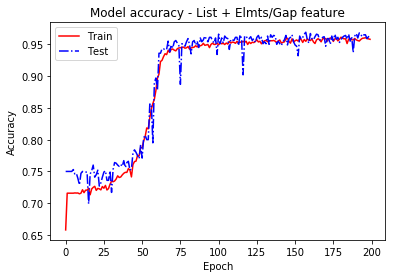

In [13]:
plt.plot(history_feature.history['acc'],"r-")
plt.plot(history_feature.history['val_acc'],"b-.")
plt.title('Model accuracy - List + Elmts/Gap feature')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

Now the training is also affecting the test set. We have much less overfitting.

---

### Model evalution

In [14]:
print_accuracy_table(model_feature,X_test_feature,data_test_Y,data_test_X)

   List Size   Accuracy   % of True answers   % of True instances   Random Expectation    Nbr
         0.0        0.0                 0.0                   0.0                  0.0    0.0
         1.0        0.0                 0.0                   0.0                  0.0    0.0
         2.0      100.0                 0.0                   0.0                100.0   47.0
         3.0      100.0                 0.0                   0.0                100.0   49.0
         4.0      100.0                 0.0                   0.0                100.0   55.0
         5.0      100.0                 0.0                   0.0                100.0   58.0
         6.0      100.0                 0.0                   0.0                100.0   67.0
         7.0      97.62                 0.0                  2.38                97.62   42.0
         8.0      94.74                 0.0                  5.26                94.74   57.0
         9.0      82.98                2.13                 

In [15]:
results_stats(model_feature,X_test_feature,Y_test_feature)

1000/1000 [==============================] - 0s 67us/sample - loss: 0.0923 - acc: 0.9640
Prediction accuracy : 0.964

Vrai True : 229
True classe False : 21
True : 250

Vrai False : 735
False classe True: 15
False : 750

